In [1]:
from DDPM_tools import train, DiffusionTools
from DDPM_model import UNet, SimpleUnet
import torch
from DDPM_utils import save_images
from torchvision import transforms
import matplotlib.pyplot as plt
from config import *
import PIL

In [2]:
model = SimpleUnet()
model.load_state_dict(torch.load(r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\DDPM_improved1\models\DDPM_Unconditional_256.pth"))
model.eval()

SimpleUnet(
  (time_mlp): Sequential(
    (0): SinusoidalPositionEmbeddings()
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): ReLU()
  )
  (conv0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (downs): ModuleList(
    (0): Block(
      (time_mlp): Linear(in_features=32, out_features=128, bias=True)
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transform): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): Block(
      (time_mlp): Linear(in_features=32, out_features=256, bias=True)
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transfor

In [3]:
model.to("cuda")
diffusion = DiffusionTools(img_size=IMAGE_SIZE)
image = diffusion.sample(model, 1)

06:48:52 - INFO: Sampling 1 images
999it [02:31,  6.57it/s]


In [4]:
save_images(image, r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\DDPM_improved1\results\DDPM_Unconditional_256\result.png")

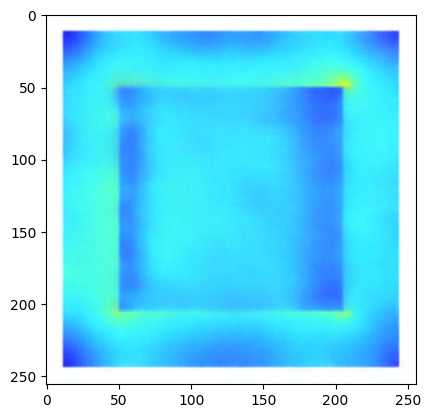

In [5]:
image = transforms.ToPILImage()(image[0])
plt.imshow(image)

In [6]:
image.save(r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\DDPM_improved1\results\DDPM_Unconditional_64\result2.png")